In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
import time
from datetime import datetime
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.titlesize'] = 18

In [8]:
usr = pd.read_csv('slots-usr.txt', names=['slot'])
usr.head()

,slot
0,6112798
1,6112802
2,6112803
3,6112804
4,6112806


In [44]:
orphans = pd.read_csv('forked.txt')
orphans.head()

,slot
0,6163137
1,6163114
2,6163076
3,6163049
4,6163026


In [51]:
orphans['slot'].values

array([6163137, 6163114, 6163076, 6163049, 6163026, 6163023, 6163009,
       6162949, 6162939, 6162921, 6162854, 6162844, 6162804, 6162787,
       6162773, 6162746, 6162721, 6162632, 6162615, 6162577, 6162495,
       6162486, 6162477, 6162465, 6162417, 6162409, 6162400, 6162394,
       6162380, 6162367, 6162359, 6162356, 6162323, 6162297, 6162236,
       6162214, 6162203, 6162190, 6162116, 6162114, 6162023, 6161988,
       6161981, 6161973, 6161935, 6161906, 6161845, 6161796, 6161745,
       6161645, 6161639, 6161611, 6161537, 6161529, 6161520, 6161518,
       6161370, 6161340, 6161238, 6161222, 6161048, 6161041, 6161035,
       6160754, 6160673, 6160385, 6160379, 6160199, 6160066, 6159969,
       6159851, 6159784, 6159782, 6159777, 6159716, 6159602, 6159421,
       6159320, 6159294, 6159290, 6159239, 6159219, 6159110, 6158884,
       6158862, 6158666, 6158529, 6158485, 6158465, 6158395, 6158372,
       6158354, 6158333, 6158319, 6158276, 6158237, 6158223, 6158166,
       6158149, 6158

In [19]:
allslots = np.arange(6112797, 6163198)

In [20]:
usr['slot'].values

array([6112798, 6112802, 6112803, ..., 6163194, 6163195, 6163201])

In [46]:
usr_slots = []
usr_orphans = []
for a in allslots:
    if a in usr['slot'].values:
        usr_slots.append(1)
        if a in orphans['slot']:
            usr_orphans.append(1)
        else:
            usr_orphans.append(0)
    else:
        usr_slots.append(0)
        usr_orphans.append(0)
usr_slots = np.asarray(usr_slots)
usr_orphans = np.asarray(usr_orphans)

In [22]:
len(usr_slots)

50401

In [48]:
len(usr_orphans), usr_orphans.sum()

(50401, 0)

In [52]:
df = pd.DataFrame()
df['slots'] = allslots
df['usr_slots'] = usr_slots
df['usr_orphans'] = usr_orphans
df['usr_daily'] = df['usr_slots'].rolling(7200).mean()

In [24]:
df['usr_slots']

0        0
1        1
2        0
3        0
4        0
        ..
50396    0
50397    1
50398    1
50399    0
50400    0
Name: usr_slots, Length: 50401, dtype: int64

In [33]:
usr['slot'].values

array([6112798, 6112802, 6112803, ..., 6163194, 6163195, 6163201])

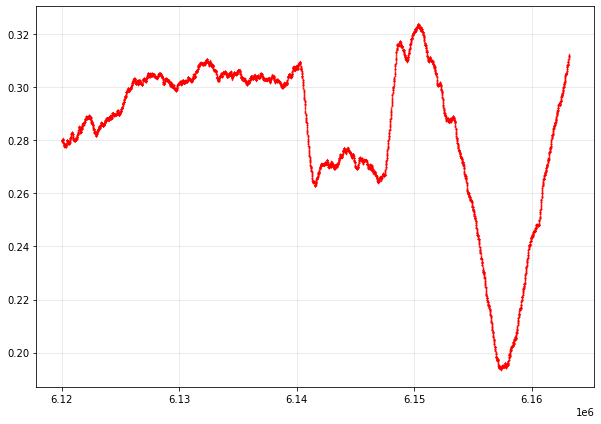

In [53]:
f, ax = plt.subplots(figsize=(10,7))

# ax.plot(df['slots'], df['usr_slots'], 'r,')
ax.plot(df['slots'], df['usr_daily'], 'r.', alpha=0.3, markersize=1)

plt.show()

In [ ]:
6155998

In [55]:
usr['slot']

0        6112798
1        6112802
2        6112803
3        6112804
4        6112806
          ...   
14467    6163190
14468    6163191
14469    6163194
14470    6163195
14471    6163201
Name: slot, Length: 14472, dtype: int64

In [58]:
usr_orphans = []
for s in usr['slot']:
    if s >= 6155998:
        time.sleep(0.1)
        url = 'http://57.128.92.65:3500/eth/v1/beacon/headers/{}'.format(s)
        headers = {'content-type': 'application/json'}
        r = requests.get(url, headers=headers)
        try: 
            code = r.json()['code']
            print(s, False)
            usr_orphans.append((s, False))
        except KeyError:
            print(s, True)
            usr_orphans.append((s, True))
usr_orphans = np.asarray(usr_orphans)

6156000 True
6156051 True
6156098 True
6156130 True
6156137 True
6156140 True
6156142 True
6156154 True
6156159 True
6156161 True
6156186 True
6156192 True
6156193 True
6156196 True
6156197 True
6156225 True
6156227 True
6156236 True
6156249 True
6156250 True
6156252 True
6156253 True
6156264 True
6156265 True
6156267 True
6156297 True
6156301 True
6156302 True
6156305 True
6156312 True
6156318 True
6156333 True
6156335 True
6156338 True
6156343 True
6156345 True
6156349 True
6156350 True
6156357 True
6156360 True
6156368 True
6156369 True
6156375 True
6156380 True
6156415 True
6156416 True
6156423 True
6156438 True
6156440 True
6156451 True
6156481 True
6156494 True
6156529 True
6156535 True
6156552 True
6156565 True
6156580 True
6156643 True
6156654 True
6156655 True
6156661 True
6156662 True
6156665 True
6156667 True
6156669 True
6156688 True
6156695 True
6156696 True
6156698 True
6156699 True
6156700 True
6156701 True
6156703 True
6156705 True
6156707 True
6156710 True
6156716 True

6158579 True
6158580 True
6158593 True
6158595 True
6158596 True
6158597 True
6158598 True
6158599 True
6158601 True
6158604 True
6158608 True
6158609 True
6158613 True
6158618 True
6158629 True
6158630 True
6158631 True
6158632 True
6158633 True
6158636 True
6158637 True
6158638 True
6158641 True
6158649 True
6158658 True
6158659 True
6158660 True
6158661 True
6158662 True
6158665 True
6158668 True
6158669 True
6158671 True
6158673 True
6158674 True
6158676 True
6158679 True
6158680 True
6158682 True
6158684 True
6158686 True
6158688 True
6158692 True
6158694 True
6158695 True
6158697 True
6158699 True
6158701 True
6158702 True
6158703 True
6158708 True
6158713 True
6158714 True
6158723 True
6158724 True
6158728 True
6158732 True
6158735 True
6158737 True
6158739 True
6158741 True
6158742 True
6158743 True
6158747 True
6158748 True
6158749 True
6158750 True
6158752 True
6158753 True
6158756 True
6158761 True
6158763 True
6158769 True
6158771 True
6158773 True
6158774 True
6158777 True

6160255 True
6160256 True
6160260 True
6160262 True
6160265 True
6160266 True
6160270 True
6160271 True
6160272 True
6160275 True
6160276 True
6160278 True
6160281 True
6160286 True
6160287 True
6160299 True
6160302 True
6160305 True
6160308 True
6160309 True
6160311 True
6160314 True
6160318 True
6160320 True
6160321 True
6160322 True
6160324 True
6160325 True
6160328 True
6160331 True
6160333 True
6160336 True
6160338 True
6160341 True
6160342 True
6160343 True
6160347 True
6160348 True
6160351 True
6160352 True
6160353 True
6160355 True
6160358 True
6160363 True
6160366 True
6160367 True
6160368 True
6160369 True
6160373 True
6160374 True
6160375 True
6160378 True
6160382 True
6160384 True
6160387 True
6160388 True
6160389 True
6160391 True
6160394 True
6160396 True
6160398 True
6160400 True
6160404 True
6160407 True
6160409 True
6160417 True
6160424 True
6160428 True
6160429 True
6160430 True
6160431 True
6160432 True
6160434 True
6160436 True
6160441 True
6160444 True
6160449 True

6162042 True
6162044 True
6162049 True
6162050 True
6162051 True
6162054 True
6162057 True
6162059 True
6162061 True
6162065 True
6162066 True
6162068 True
6162069 True
6162074 True
6162075 True
6162076 True
6162077 True
6162079 True
6162087 True
6162094 True
6162095 True
6162099 True
6162100 True
6162101 True
6162102 True
6162104 True
6162107 True
6162108 True
6162110 True
6162112 True
6162119 True
6162121 True
6162123 True
6162124 True
6162129 True
6162130 True
6162135 True
6162136 True
6162143 True
6162152 True
6162154 True
6162155 True
6162157 True
6162160 True
6162163 True
6162165 True
6162173 True
6162174 True
6162175 True
6162176 True
6162180 True
6162181 True
6162182 True
6162183 True
6162187 True
6162195 True
6162196 True
6162197 True
6162201 True
6162206 True
6162207 True
6162209 True
6162213 True
6162216 True
6162225 True
6162226 True
6162227 True
6162230 True
6162240 True
6162241 True
6162242 True
6162243 True
6162244 True
6162247 True
6162248 True
6162251 True
6162252 True

In [59]:
# FBS

In [60]:
fbs = pd.read_csv('fbs.csv', names=['slot'])
fbs.head()

,slot
0,6148802
1,6148805
2,6148806
3,6148809
4,6148810


In [61]:
orphans = pd.read_csv('forked.txt')
orphans.head()

,slot
0,6163137
1,6163114
2,6163076
3,6163049
4,6163026


In [62]:
orphans['slot'].values

array([6163137, 6163114, 6163076, 6163049, 6163026, 6163023, 6163009,
       6162949, 6162939, 6162921, 6162854, 6162844, 6162804, 6162787,
       6162773, 6162746, 6162721, 6162632, 6162615, 6162577, 6162495,
       6162486, 6162477, 6162465, 6162417, 6162409, 6162400, 6162394,
       6162380, 6162367, 6162359, 6162356, 6162323, 6162297, 6162236,
       6162214, 6162203, 6162190, 6162116, 6162114, 6162023, 6161988,
       6161981, 6161973, 6161935, 6161906, 6161845, 6161796, 6161745,
       6161645, 6161639, 6161611, 6161537, 6161529, 6161520, 6161518,
       6161370, 6161340, 6161238, 6161222, 6161048, 6161041, 6161035,
       6160754, 6160673, 6160385, 6160379, 6160199, 6160066, 6159969,
       6159851, 6159784, 6159782, 6159777, 6159716, 6159602, 6159421,
       6159320, 6159294, 6159290, 6159239, 6159219, 6159110, 6158884,
       6158862, 6158666, 6158529, 6158485, 6158465, 6158395, 6158372,
       6158354, 6158333, 6158319, 6158276, 6158237, 6158223, 6158166,
       6158149, 6158

In [63]:
allslots = np.arange(6148797, 6163198)

In [64]:
fbs['slot'].values

array([6148802, 6148805, 6148806, ..., 6163180, 6163183, 6163197])

In [65]:
fbs_slots = []
fbs_orphans = []
for a in allslots:
    if a in fbs['slot'].values:
        fbs_slots.append(1)
        if a in orphans['slot']:
            fbs_orphans.append(1)
        else:
            fbs_orphans.append(0)
    else:
        fbs_slots.append(0)
        fbs_orphans.append(0)
fbs_slots = np.asarray(fbs_slots)
fbs_orphans = np.asarray(fbs_orphans)

In [67]:
len(fbs_slots)

14401

In [68]:
len(fbs_orphans), fbs_orphans.sum()

(14401, 0)

In [71]:
fbs_orphans.shape

(3383, 2)

In [78]:
fbs_orphans[fbs_orphans[:,1]==0][:,0]

array([6149088, 6150528, 6150817, 6151300, 6151963, 6153088, 6154150,
       6154283, 6154575, 6155692, 6158010, 6158465, 6158666, 6158862,
       6159239, 6159777, 6161537, 6161845, 6162400])

In [80]:
fbs_o = np.zeros(len(allslots))
for i,a in enumerate(allslots):
    if a in fbs_orphans[fbs_orphans[:,1]==0][:,0]:
        fbs_o[i] = 1

In [82]:
len(fbs_o), sum(fbs_o)

(14401, 19.0)

In [87]:
df = pd.DataFrame()
df['slots'] = allslots
df['fbs_slots'] = fbs_slots
df['fbs_orphans'] = fbs_o
df['fbs_6hour'] = df['fbs_slots'].rolling(1800).mean()
df['fbs_orphans_6hour'] = df['fbs_orphans'].rolling(7200).mean()

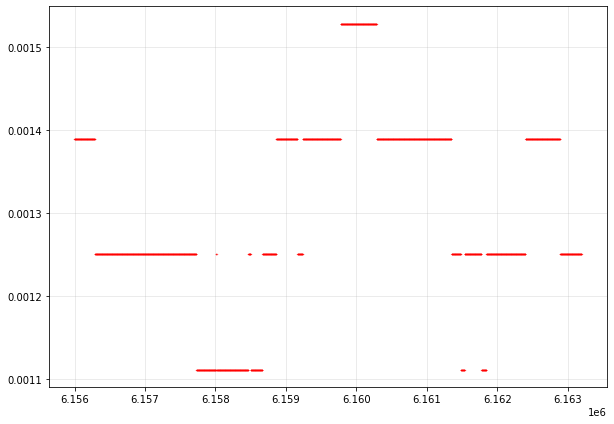

In [88]:
f, ax = plt.subplots(figsize=(10,7))

# ax.plot(df['slots'], df['usr_slots'], 'r,')
# ax.plot(df['slots'], df['fbs_6hour'], 'r.', alpha=0.3, markersize=1)
ax.plot(df['slots'], df['fbs_orphans_6hour'], 'r.', alpha=0.3, markersize=1)

plt.show()

In [ ]:
6155998

In [55]:
usr['slot']

0        6112798
1        6112802
2        6112803
3        6112804
4        6112806
          ...   
14467    6163190
14468    6163191
14469    6163194
14470    6163195
14471    6163201
Name: slot, Length: 14472, dtype: int64

In [69]:
fbs_orphans = []
for s in fbs['slot']:
    time.sleep(0.1)
    url = 'http://57.128.92.65:3500/eth/v1/beacon/headers/{}'.format(s)
    headers = {'content-type': 'application/json'}
    r = requests.get(url, headers=headers)
    try: 
        code = r.json()['code']
        print(s, False)
        fbs_orphans.append((s, False))
    except KeyError:
        print(s, True)
        fbs_orphans.append((s, True))
fbs_orphans = np.asarray(fbs_orphans)

6148802 True
6148805 True
6148806 True
6148809 True
6148810 True
6148813 True
6148817 True
6148820 True
6148821 True
6148823 True
6148825 True
6148826 True
6148828 True
6148830 True
6148834 True
6148836 True
6148838 True
6148843 True
6148845 True
6148846 True
6148855 True
6148856 True
6148860 True
6148862 True
6148864 True
6148866 True
6148868 True
6148875 True
6148876 True
6148880 True
6148881 True
6148882 True
6148884 True
6148886 True
6148887 True
6148889 True
6148892 True
6148895 True
6148910 True
6148912 True
6148919 True
6148923 True
6148930 True
6148932 True
6148935 True
6148939 True
6148940 True
6148948 True
6148953 True
6148956 True
6148957 True
6148962 True
6148964 True
6148976 True
6148982 True
6148984 True
6148996 True
6149000 True
6149006 True
6149026 True
6149031 True
6149034 True
6149047 True
6149048 True
6149049 True
6149060 True
6149062 True
6149071 True
6149072 True
6149073 True
6149074 True
6149075 True
6149076 True
6149080 True
6149084 True
6149088 False
6149090 Tru

6151225 True
6151227 True
6151228 True
6151229 True
6151236 True
6151245 True
6151257 True
6151263 True
6151269 True
6151271 True
6151273 True
6151275 True
6151277 True
6151278 True
6151279 True
6151282 True
6151287 True
6151295 True
6151300 False
6151302 True
6151307 True
6151309 True
6151311 True
6151314 True
6151316 True
6151323 True
6151327 True
6151330 True
6151338 True
6151345 True
6151347 True
6151352 True
6151355 True
6151365 True
6151370 True
6151373 True
6151378 True
6151383 True
6151385 True
6151386 True
6151390 True
6151392 True
6151400 True
6151403 True
6151404 True
6151406 True
6151416 True
6151419 True
6151424 True
6151427 True
6151429 True
6151438 True
6151445 True
6151448 True
6151453 True
6151465 True
6151468 True
6151471 True
6151474 True
6151482 True
6151489 True
6151495 True
6151496 True
6151498 True
6151507 True
6151511 True
6151512 True
6151518 True
6151520 True
6151522 True
6151524 True
6151530 True
6151531 True
6151553 True
6151555 True
6151556 True
6151558 Tru

6153708 True
6153724 True
6153726 True
6153727 True
6153737 True
6153740 True
6153745 True
6153748 True
6153752 True
6153753 True
6153758 True
6153763 True
6153770 True
6153772 True
6153774 True
6153775 True
6153776 True
6153781 True
6153783 True
6153789 True
6153790 True
6153796 True
6153797 True
6153799 True
6153813 True
6153814 True
6153815 True
6153835 True
6153836 True
6153838 True
6153840 True
6153843 True
6153844 True
6153849 True
6153853 True
6153856 True
6153858 True
6153860 True
6153866 True
6153867 True
6153872 True
6153877 True
6153881 True
6153886 True
6153890 True
6153891 True
6153893 True
6153895 True
6153907 True
6153911 True
6153918 True
6153930 True
6153932 True
6153934 True
6153937 True
6153944 True
6153945 True
6153954 True
6153956 True
6153959 True
6153962 True
6153963 True
6153964 True
6153978 True
6153979 True
6153980 True
6153982 True
6153983 True
6153989 True
6153998 True
6154003 True
6154004 True
6154007 True
6154015 True
6154034 True
6154036 True
6154041 True

6156810 True
6156811 True
6156813 True
6156814 True
6156816 True
6156819 True
6156820 True
6156821 True
6156822 True
6156823 True
6156828 True
6156839 True
6156853 True
6156855 True
6156858 True
6156865 True
6156868 True
6156874 True
6156878 True
6156880 True
6156881 True
6156883 True
6156884 True
6156885 True
6156887 True
6156898 True
6156901 True
6156912 True
6156913 True
6156914 True
6156921 True
6156923 True
6156924 True
6156925 True
6156932 True
6156933 True
6156937 True
6156940 True
6156952 True
6156958 True
6156961 True
6156969 True
6156971 True
6156972 True
6156975 True
6156979 True
6156981 True
6156982 True
6156991 True
6157004 True
6157005 True
6157016 True
6157018 True
6157023 True
6157031 True
6157032 True
6157035 True
6157036 True
6157037 True
6157039 True
6157048 True
6157054 True
6157057 True
6157060 True
6157064 True
6157070 True
6157073 True
6157078 True
6157086 True
6157087 True
6157088 True
6157092 True
6157099 True
6157105 True
6157111 True
6157112 True
6157113 True

6159302 True
6159306 True
6159311 True
6159313 True
6159315 True
6159316 True
6159317 True
6159319 True
6159323 True
6159329 True
6159335 True
6159336 True
6159337 True
6159342 True
6159344 True
6159351 True
6159352 True
6159353 True
6159355 True
6159365 True
6159368 True
6159373 True
6159375 True
6159378 True
6159386 True
6159388 True
6159390 True
6159402 True
6159405 True
6159406 True
6159410 True
6159415 True
6159419 True
6159423 True
6159425 True
6159428 True
6159430 True
6159434 True
6159436 True
6159441 True
6159449 True
6159454 True
6159466 True
6159468 True
6159472 True
6159475 True
6159476 True
6159478 True
6159482 True
6159486 True
6159491 True
6159492 True
6159493 True
6159494 True
6159496 True
6159497 True
6159500 True
6159505 True
6159507 True
6159509 True
6159511 True
6159512 True
6159518 True
6159527 True
6159529 True
6159531 True
6159536 True
6159540 True
6159542 True
6159553 True
6159556 True
6159557 True
6159560 True
6159561 True
6159562 True
6159567 True
6159568 True

6162055 True
6162056 True
6162085 True
6162092 True
6162103 True
6162106 True
6162109 True
6162118 True
6162123 True
6162127 True
6162130 True
6162133 True
6162141 True
6162142 True
6162151 True
6162153 True
6162158 True
6162159 True
6162160 True
6162164 True
6162168 True
6162194 True
6162206 True
6162220 True
6162223 True
6162224 True
6162226 True
6162231 True
6162233 True
6162234 True
6162238 True
6162239 True
6162241 True
6162246 True
6162254 True
6162258 True
6162259 True
6162260 True
6162261 True
6162264 True
6162269 True
6162270 True
6162278 True
6162280 True
6162285 True
6162294 True
6162301 True
6162302 True
6162303 True
6162307 True
6162310 True
6162311 True
6162313 True
6162315 True
6162318 True
6162325 True
6162326 True
6162333 True
6162336 True
6162341 True
6162342 True
6162344 True
6162345 True
6162350 True
6162351 True
6162362 True
6162363 True
6162371 True
6162398 True
6162400 False
6162405 True
6162406 True
6162411 True
6162435 True
6162439 True
6162442 True
6162446 Tru

In [ ]:
url = 'http://57.128.92.65:3500/eth/v1/beacon/headers/{}'.format(s)
headers = {'content-type': 'application/json'}
r = requests.get(url, headers=headers)